## Gaussian beams

for a gaussian beam the waist is defined as follow

$$ w(z) = w_0 \sqrt{1+\left( \frac{\lambda z}{\pi w_0^2} \right)^2} = w_0 \sqrt{1+\left( \frac{z}{z_R} \right)^2} $$

while the rayleigh range can be expressed as:

$$ z_R = \frac{\pi w_0^2}{\lambda} $$

In [173]:
import numpy as np
import matplotlib.pyplot as plt

def get_rayleigh_range(w0, wavelenght):
    return np.pi*w0**2/wavelenght

def get_wz(z, w0, wavelenght):
    return w0*np.sqrt(1+(z/get_rayleigh_range(w0, wavelenght))**2)

def intensity_profile_z(z, x, w0, wavelenght):
    return np.exp(-x**2/(2*get_wz(z, w0, wavelenght)**2))/(np.sqrt(2*np.pi*get_wz(z, w0, wavelenght)**2))

def inverse_intensity_profile_z(z, I, w0, wavelenght):
    return get_wz(z, w0, wavelenght)*np.sqrt(2*np.log(1/(I*np.sqrt(2*np.pi*get_wz(z, w0, wavelenght)**2))))

In [174]:
waist_0 = 3 # [um]
wavelenght = 840 * 10**-3 # [um]

z_R = get_rayleigh_range(waist_0, wavelenght)

zs = np.linspace(-2*z_R, 2*z_R, 10000)
wzs = get_wz(zs, waist_0, wavelenght)

x_fixedIs = []
for x in np.linspace(0, waist_0, 10):
    I0 = intensity_profile_z(0, x, waist_0, wavelenght)
    x_fixedIs.append(inverse_intensity_profile_z(zs, I0, waist_0, wavelenght))

/var/folders/gq/pyfb45qx3wg52k7kygqcjy840000gn/T/ipykernel_39090/3525387039.py:14: RuntimeWarning: invalid value encountered in sqrt
  return get_wz(z, w0, wavelenght)*np.sqrt(2*np.log(1/(I*np.sqrt(2*np.pi*get_wz(z, w0, wavelenght)**2))))


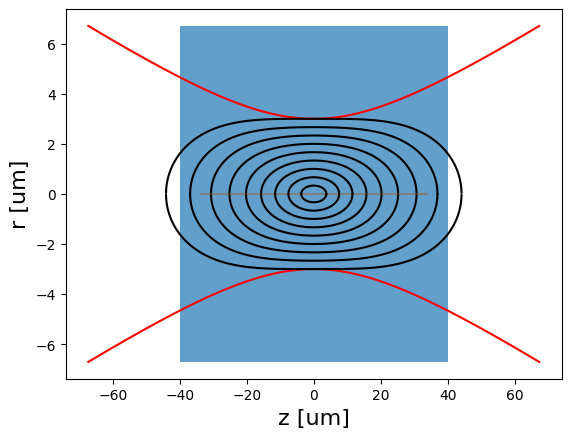

In [175]:
M = max(wzs)
plt.fill_between([-40, 40],[M, M],[-M, -M], alpha =0.7)

plt.plot(zs, wzs, c="r")
plt.plot(zs, -wzs, c="r")
plt.plot([-z_R,z_R],[0,0], c="gray")
for x_fixedI in x_fixedIs:
    plt.plot(zs, x_fixedI, c="black")
    plt.plot(zs, -x_fixedI, c="black")

plt.xlabel("z [um]",fontsize=16)
plt.ylabel("r [um]",fontsize=16)

plt.show()

## trap depth

the

$$ U_{dip}(z, r) = \frac{3 \pi c^2}{2 \omega_0^3} \frac{\Gamma}{\Delta} I(z, r) $$

$$ I(z, r) = \frac{2P}{\pi w(z)^2} e^{\frac{-2 r^2}{w(z)^2}} $$

so

$$ U_{dip}(z, r) =  \frac{3 \pi c^2}{2 \omega_0^3} \frac{\Gamma}{\Delta} \frac{2P}{\pi w(z)^2} e^{\frac{-2 r^2}{w(z)^2}} = \frac{3 c^2  P}{\omega_0^3 w(z)^2 }  \frac{\Gamma}{\Delta}  e^{-\frac{2 z^2}{w(z)^2} } $$

where 

$$ \Gamma = \frac{e^2 \omega_0^2}{6 \pi \epsilon_0 m_e c^3} $$

In [176]:
import scipy.constants as scc

class dipolar_trap:
    def __init__(self, power, waist_0) -> None:
        self.waist_0 = waist_0
        self.power = power
        self.rubidium_mass = 1.41810133E-25 # kg
        self.Delta = -2*np.pi*27e12
        self.omega_0 = 2*np.pi*377e12
        self.Gamma = scc.e**2*self.omega_0**2/(6*np.pi*scc.epsilon_0*scc.m_e*scc.c**3)
        self.wavelenght = 840e-9
        self.z_R = np.pi*waist_0**2/self.wavelenght
        pass

    def get_wz(self, z):
        return self.waist_0*np.sqrt(1+(z/self.z_R)**2)

    def I(self, z, r):
        return 2*self.power*np.exp(-2*r**2/(self.get_wz(z)**2))/(np.pi*self.get_wz(z)**2)

    def U_dip(self, z, r):
        """
        returns the potential in mK.
        """
        return (3*np.pi*scc.c**2)/(2*self.omega_0**3) * (self.Gamma/self.Delta) * self.I(z, r) / scc.Boltzmann * 10**3


In [177]:
power = 100e-3
waist_0 = 5e-6

my_dip = dipolar_trap(power = power, waist_0=waist_0)

my_dip.U_dip(0,0)

-1.218131989059936